In [2]:
import pandas as pd
from IPython.display import display
import graphviz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
def visualize_request_flow(fn, counter):
    df = pd.read_csv(fn)
    if counter > 0:
        df = df[df['counter']==counter]
    # display(df)
    grouped_df = df.groupby(['counter','src_svc', 'dst_svc', 'src_cid', 'dst_cid']).agg({'flow': 'sum', 'total': 'max'}).reset_index()
    grouped_df['weight'] = grouped_df['flow']/grouped_df['total']
    # display(grouped_df)

    node_color_dict = dict()
    node_color_dict["XXXX"] = "gray"
    node_color_dict['-1'] = "#FFBF00"
    node_color_dict['us-west-1'] = "#FFBF00"
    node_color_dict['us-east-1'] = "#ff6375"
    node_color_dict['us-south-1'] = "#bbfbfc"
    node_color_dict['us-central-1'] = "#c8ffbf"

    g_ = graphviz.Digraph()
    # plot_dict_wo_compute_edge(network_arc, g_)
    node_pw = "1"
    edge_pw = "0.5"
    fs = "8"
    edge_fs = "10"
    fn="times bold italic"
    edge_arrowsize="0.5"
    edge_minlen="1"
    cluster_list = list()
    for index, row in df.iterrows():
        # if row["flow"] <= 0 or row["weight"] <= 0:
        if row["weight"] <= 0:
            print(f"Weight is less than 0")
            print(f"Skip this row: {row}")
            continue
        src_cid = row["src_cid"]
        dst_cid = row["dst_cid"]
        src_svc = row["src_svc"].split("-")[-1]
        dst_svc = row["dst_svc"].split("-")[-1]
        cluster_list.append(src_cid)
        if src_cid == dst_cid or src_svc == "SOURCE":
            edge_color = 'black'
        else:
            edge_color = 'blue'
        edge_style = 'filled'
        src_node_color = node_color_dict[src_cid]
        dst_node_color = node_color_dict[dst_cid]
        src_node_name = src_svc+str(src_cid)
        dst_node_name = dst_svc+str(dst_cid)
        src_node_label = src_svc+"\n"+str(src_cid)
        dst_node_label = dst_svc+"\n"+str(dst_cid)
        # src_node
        g_.node(name=src_node_name, label=src_node_label, shape='circle', style='filled', fillcolor=src_node_color, penwidth=node_pw, fontsize=fs, fontname=fn, fixedsize="True", width="0.5")
        # dst_node
        g_.node(name=dst_node_name, label=dst_node_label, shape='circle', style='filled', fillcolor=dst_node_color, penwidth=node_pw, fontsize=fs, fontname=fn, fixedsize="True", width="0.5")
        # edge from src_node to dst_node        
        # edge_label = f'{round(row["flow"],1)}({round(row["weight"], 2)})'
        edge_label = f'{round(row["flow"],1)}({int(round(row["weight"], 2)*100)}%)'
        g_.edge(src_node_name, dst_node_name, label=edge_label, penwidth=edge_pw, style=edge_style, fontsize=edge_fs, fontcolor=edge_color, color=edge_color, arrowsize=edge_arrowsize, minlen=edge_minlen)
        
    # Adding a legend
    with g_.subgraph(name='cluster_legend') as c:
        c.attr(label='Legend')
        legend_fontsize='10'
        for cluster in cluster_list:
            if cluster == "XXXX":
                continue
            c.node(cluster, label=cluster.split('-')[1], shape='circle', style='filled', fillcolor=node_color_dict[cluster], fontsize=legend_fontsize, fixedsize='true', width='0.3', height='0.3')
    return g_


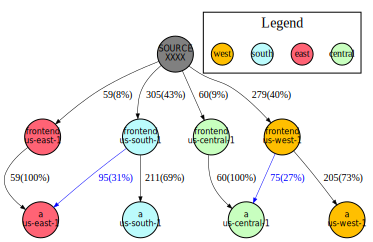

In [20]:
fn = 'test.csv'
counter = -1
g_ = visualize_request_flow(fn, counter)
# g_.render('/users/gangmuk/projects/slate-benchmark/metrics-microservice-app/runtime-test/w300c50s300e50/graphviz')
g_